In [1]:
# Suppressing warnings
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Data handling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Resampling methods
from imblearn.over_sampling import SMOTE, SMOTENC

# Pipeline and model selection
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from collections import Counter

# Web Interaction and Display
from IPython.display import Image, display, HTML

# Additional JavaScript for toggling code display in Jupyter Notebooks
HTML(
    """
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
"""
)

<img src="TitlePage.png" alt="Title" class="center">
<center>PART 2</center>

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">INTRODUCTION</h1></center>
</div> 

This is another dataset sourced from Kaggle that is about Loan Defaults. The sole purpose of this run is for comparison purposes only (See MainNotebook.ipynb). Minimal Data Processing was done and the primary goal is to showcase how SMOTE works in another industry like this one. 

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">Basic Data Processing</h1></center>
</div> 

## Loading the Data

In [2]:
df_default = pd.read_csv('loan_data.csv')
df_default.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


<center><b>Table 1</b>. Loan Default Dataset loaded on a Python DataFrame</center>

## Null Values Handling

In [3]:
df_default['last_major_derog_none'].fillna(0, inplace=True)
df_default.dropna(inplace=True)

### Data Shape

In [4]:
df_default.shape

(18371, 15)

## Feature Engineering

In [5]:
# Step 1: Replace '36 Months' with '36 months'
df_default['term'] = df_default['term'].str.replace('36 Months', '36 months')

# Step 2: Create 'term_int' column
# Strip the ' months' part and convert the rest to integer
df_default['term_int'] = df_default['term'].str.strip().str.replace(' months', '').astype(int)
df_default.drop('term',axis=1,inplace=True)
df_default.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,term_int
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,1,0.0,43.2,0.0,0.160624,0,36
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,0,0.0,21.5,0.0,0.810777,0,36
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,1,0.0,46.3,0.0,0.035147,1,60
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,0,0.0,10.7,0.0,0.534887,1,60
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,0,0.0,15.2,0.0,0.166500,0,36


<center><b>Table 2</b>. The Loan Default Dataset after Feature Engineering</center>

In [6]:
# Remove ID
df_default = df_default.iloc[:,1:]

### All Numerical Columns

In [7]:
# Get all numerical columns
num_cols = df_default.select_dtypes(exclude="object").columns.tolist()
num_cols

['annual_inc',
 'short_emp',
 'emp_length_num',
 'dti',
 'last_delinq_none',
 'last_major_derog_none',
 'revol_util',
 'total_rec_late_fee',
 'od_ratio',
 'bad_loan',
 'term_int']

In [8]:
df_default = df_default[num_cols]

### Distribution of Target Variable

In [9]:
distribution = df_default['bad_loan'].value_counts(normalize=True)
distribution*100

bad_loan
0    79.952098
1    20.047902
Name: proportion, dtype: float64

Population per class:       0
0  14688
1   3683
Proportion Chance Criterion: 67.94%
1.25 * Proportion Chance Criterion: 84.93%


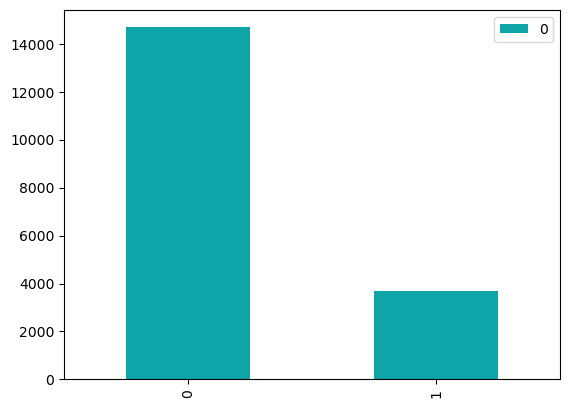

In [10]:
counts = Counter(df_default["bad_loan"])
df_state = pd.DataFrame.from_dict(counts, orient="index")
df_state.plot(kind="bar", color='#0FA4A8')

num = (df_state[0] / df_state[0].sum()) ** 2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100 * num.sum()))
print(
    "1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25 * 100 * num.sum()))

<center><b>Figure 1</b>. Distribution of Target Variable after minimal Data Preprocessing</center>
As seen in Figure 1, this is another example of an. imbalanced dataset with 80%-20% class distribution. 

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">Basic EDA</h1></center>
</div> 

In [11]:
# Data Description
df_default.describe(include='all')

,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,term_int
count,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,73421.273257,0.112297,6.827609,16.590894,0.546949,0.021610,56.001801,0.293404,0.504941,0.200479,42.031680
std,45612.958798,0.315740,3.769322,7.582902,0.497804,0.145411,43.411698,3.140913,0.287800,0.400370,10.410815
min,8412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000,36.000000
25%,47000.000000,0.000000,3.000000,10.850000,0.000000,0.000000,38.750000,0.000000,0.257495,0.000000,36.000000
50%,65000.000000,0.000000,7.000000,16.220000,1.000000,0.000000,57.100000,0.000000,0.507883,0.000000,36.000000
75%,88000.000000,0.000000,11.000000,22.060000,1.000000,0.000000,74.000000,0.000000,0.753875,0.000000,60.000000
max,1000000.000000,1.000000,11.000000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.000000,60.000000


<center><b>Table 3</b>. Data Description of Loan Default Dataset</center>

In [12]:
# Looking at Nulls and Dtypes
df_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   annual_inc             18371 non-null  float64
 1   short_emp              18371 non-null  int64  
 2   emp_length_num         18371 non-null  int64  
 3   dti                    18371 non-null  float64
 4   last_delinq_none       18371 non-null  int64  
 5   last_major_derog_none  18371 non-null  float64
 6   revol_util             18371 non-null  float64
 7   total_rec_late_fee     18371 non-null  float64
 8   od_ratio               18371 non-null  float64
 9   bad_loan               18371 non-null  int64  
 10  term_int               18371 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.7 MB


In [13]:
# Columns Used
df_default.columns

Index(['annual_inc', 'short_emp', 'emp_length_num', 'dti', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan', 'term_int'],
      dtype='object')

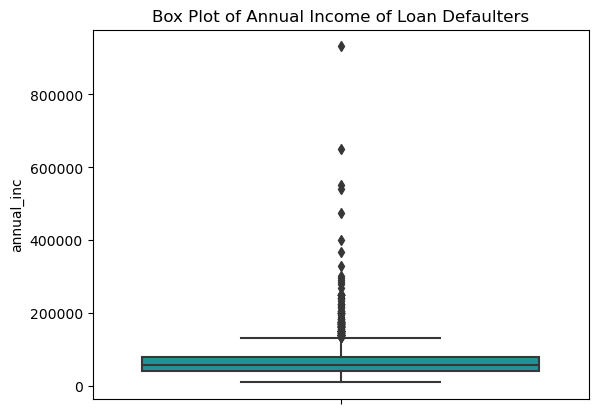

In [14]:
# Annual Income of Loan Defaulters 
annual_inc_default = df_default[df_default['bad_loan']==1]['annual_inc']
sns.boxplot(y=annual_inc_default, color="#0FA4A8")
plt.title('Box Plot of Annual Income of Loan Defaulters')
plt.show()

<center><b>Figure 2</b>. Box Plot of Annual Income of Loan Defaulters.</center>
Figure 2 reveals a significant number of outliers, with the majority of individuals earning less than $200,000 annually. Notably, despite the presence of outliers with incomes higher than the average, many of these individuals still experience defaults.

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">MACHINE LEARNING PIPELINE</h1></center>
</div> 

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Without Resampling</h2></center>
</div> 

---

### Predictor and Target Variable

In [15]:
data = df_default.copy()
X = data.drop('bad_loan', axis=1)
y = data['bad_loan']

### Train-Validation-Test Split

In [16]:
test_size = 0.20
seed=143
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=test_size, 
    stratify=y,
    random_state=seed)

### Parameters for the search using GridSearchCV

In [17]:
C_range = [1.0e-05, 1.0e-03, 1.0e-01, 1.0e01, 1.0e03, 1.0e05]
alpha_range = [1.0e-05, 1.0e-03, 1.0e-01, 1.0e01, 1.0e03, 1.0e05]
max_depth_range = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
learning_rate_range = [0.1, 0.5, 1.0]
n_neighbor_range = [5, 6, 7, 8, 9, 10, 11]
penalty = ['l1', 'l2']

### Usage of Scalers, Pipeline and Parameter Grid 

In [18]:
steps = [("scaler", StandardScaler()), ("clf", None)]
pipe = Pipeline(steps)
param_grid= [
    {
        "clf": [LinearSVC()],
        "clf__C": C_range,
        "clf__dual": ['auto'],
    },
    {
        "clf": [KNeighborsClassifier()],
        "clf__n_neighbors": n_neighbor_range,
    },
    {
        "clf": [RandomForestClassifier()],
        "clf__max_depth": max_depth_range,
    },
    {
        "clf": [GradientBoostingClassifier()],
        "clf__max_depth": max_depth_range,
        "clf__learning_rate": learning_rate_range,
    },
    {
        "clf": [LogisticRegression()],
        "clf__penalty": penalty,
        "clf__C": C_range,
        "clf__solver": ["liblinear"],
    },
]

### Determining the Right Scoring Metric

In [19]:
cv = 5
scoring = 'f1_weighted'
grid_search = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv,
                           verbose=2, n_jobs=-1, scoring=scoring)
grid_search.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 69 candidates, totalling 345 fits
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.1s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.1s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.1s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.0s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.1s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.0s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.0s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.0s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.0s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.0s
[CV] END ........clf=LinearSVC(), clf__C=0.1, clf__dual=auto; total time=   0.0s
[CV] END ........clf=LinearSVC(), clf__C=0.1, c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid=[{'clf': [LinearSVC()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__dual': ['auto']},
                         {'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [5, 6, 7, 8, 9, 10, 11]},
                         {'clf': [RandomForestClassifier()],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [GradientBoostingClassifier()],
                          'clf__learning_rate': [0.1, 0.5, 1.0],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear']}],
             return_train_score=True, scoring='f1_weighted', verbose=2)

### Determining the best model and its parameters and its score

In [20]:
print(f"The best model is: {grid_search.best_params_}")
print(f"with an accuracy score of: {grid_search.best_score_}")

The best model is: {'clf': KNeighborsClassifier(), 'clf__n_neighbors': 7}
with an accuracy score of: 0.7430755537478575


The optimal model for this heavily imbalanced dataset is a KNeighborsClassifier with parameter n_neighbors at 7.

Again the accuracy just like in the stroke dataset is quite high and near the distribution of the majority group. The high accuracy could be largely due to the model's ability to predict the majority class while failing to accurately identify the much smaller minority class, which is often the more important measure in imbalanced datasets.

In [21]:
cv_results = pd.DataFrame(grid_search.__dict__['cv_results_'])
cv_results.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__dual,param_clf__n_neighbors,param_clf__max_depth,param_clf__learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,0.034258,0.000817,1.100226,0.132062,KNeighborsClassifier(),NaN,NaN,7,NaN,NaN,...,0.743076,0.007719,1,0.780600,0.781618,0.781471,0.782006,0.783180,0.781775,0.000840
10,0.035631,0.004087,1.069599,0.104176,KNeighborsClassifier(),NaN,NaN,9,NaN,NaN,...,0.742571,0.005890,2,0.770301,0.772254,0.767124,0.771437,0.772332,0.770690,0.001927
12,0.036310,0.003646,1.128532,0.089166,KNeighborsClassifier(),NaN,NaN,11,NaN,NaN,...,0.740707,0.006444,3,0.766112,0.766001,0.758739,0.763279,0.759520,0.762730,0.003120
29,11.103994,0.184493,0.032568,0.007785,GradientBoostingClassifier(),NaN,NaN,NaN,10,0.1,...,0.740210,0.005053,4,0.941989,0.952205,0.948457,0.948297,0.948525,0.947895,0.003297
6,0.040191,0.004133,0.964215,0.020896,KNeighborsClassifier(),NaN,NaN,5,NaN,NaN,...,0.739548,0.006910,5,0.801355,0.802887,0.798789,0.800443,0.804365,0.801568,0.001929


<center><b>Table 4</b>. Results of the CV using GridSearchCV</center>

In [22]:
cv_results['param_clf'] = cv_results['param_clf'].astype(str)
grouped_results = cv_results[['mean_train_score', 'mean_test_score', 'param_clf']].groupby('param_clf').max()[['mean_train_score', 'mean_test_score']]
grouped_results

,mean_train_score,mean_test_score
param_clf,,
GradientBoostingClassifier(),1.000000,0.740210
KNeighborsClassifier(),0.801568,0.743076
LinearSVC(),0.725957,0.726222
LogisticRegression(),0.729224,0.729065
RandomForestClassifier(),0.881995,0.737994


<center><b>Table 5</b>. Performance of other Models</center>
This reveals almost the same finding as the stroke data, where Linear models have a lower train score as seen in Table 5. Ensemble models are again overfitting. 

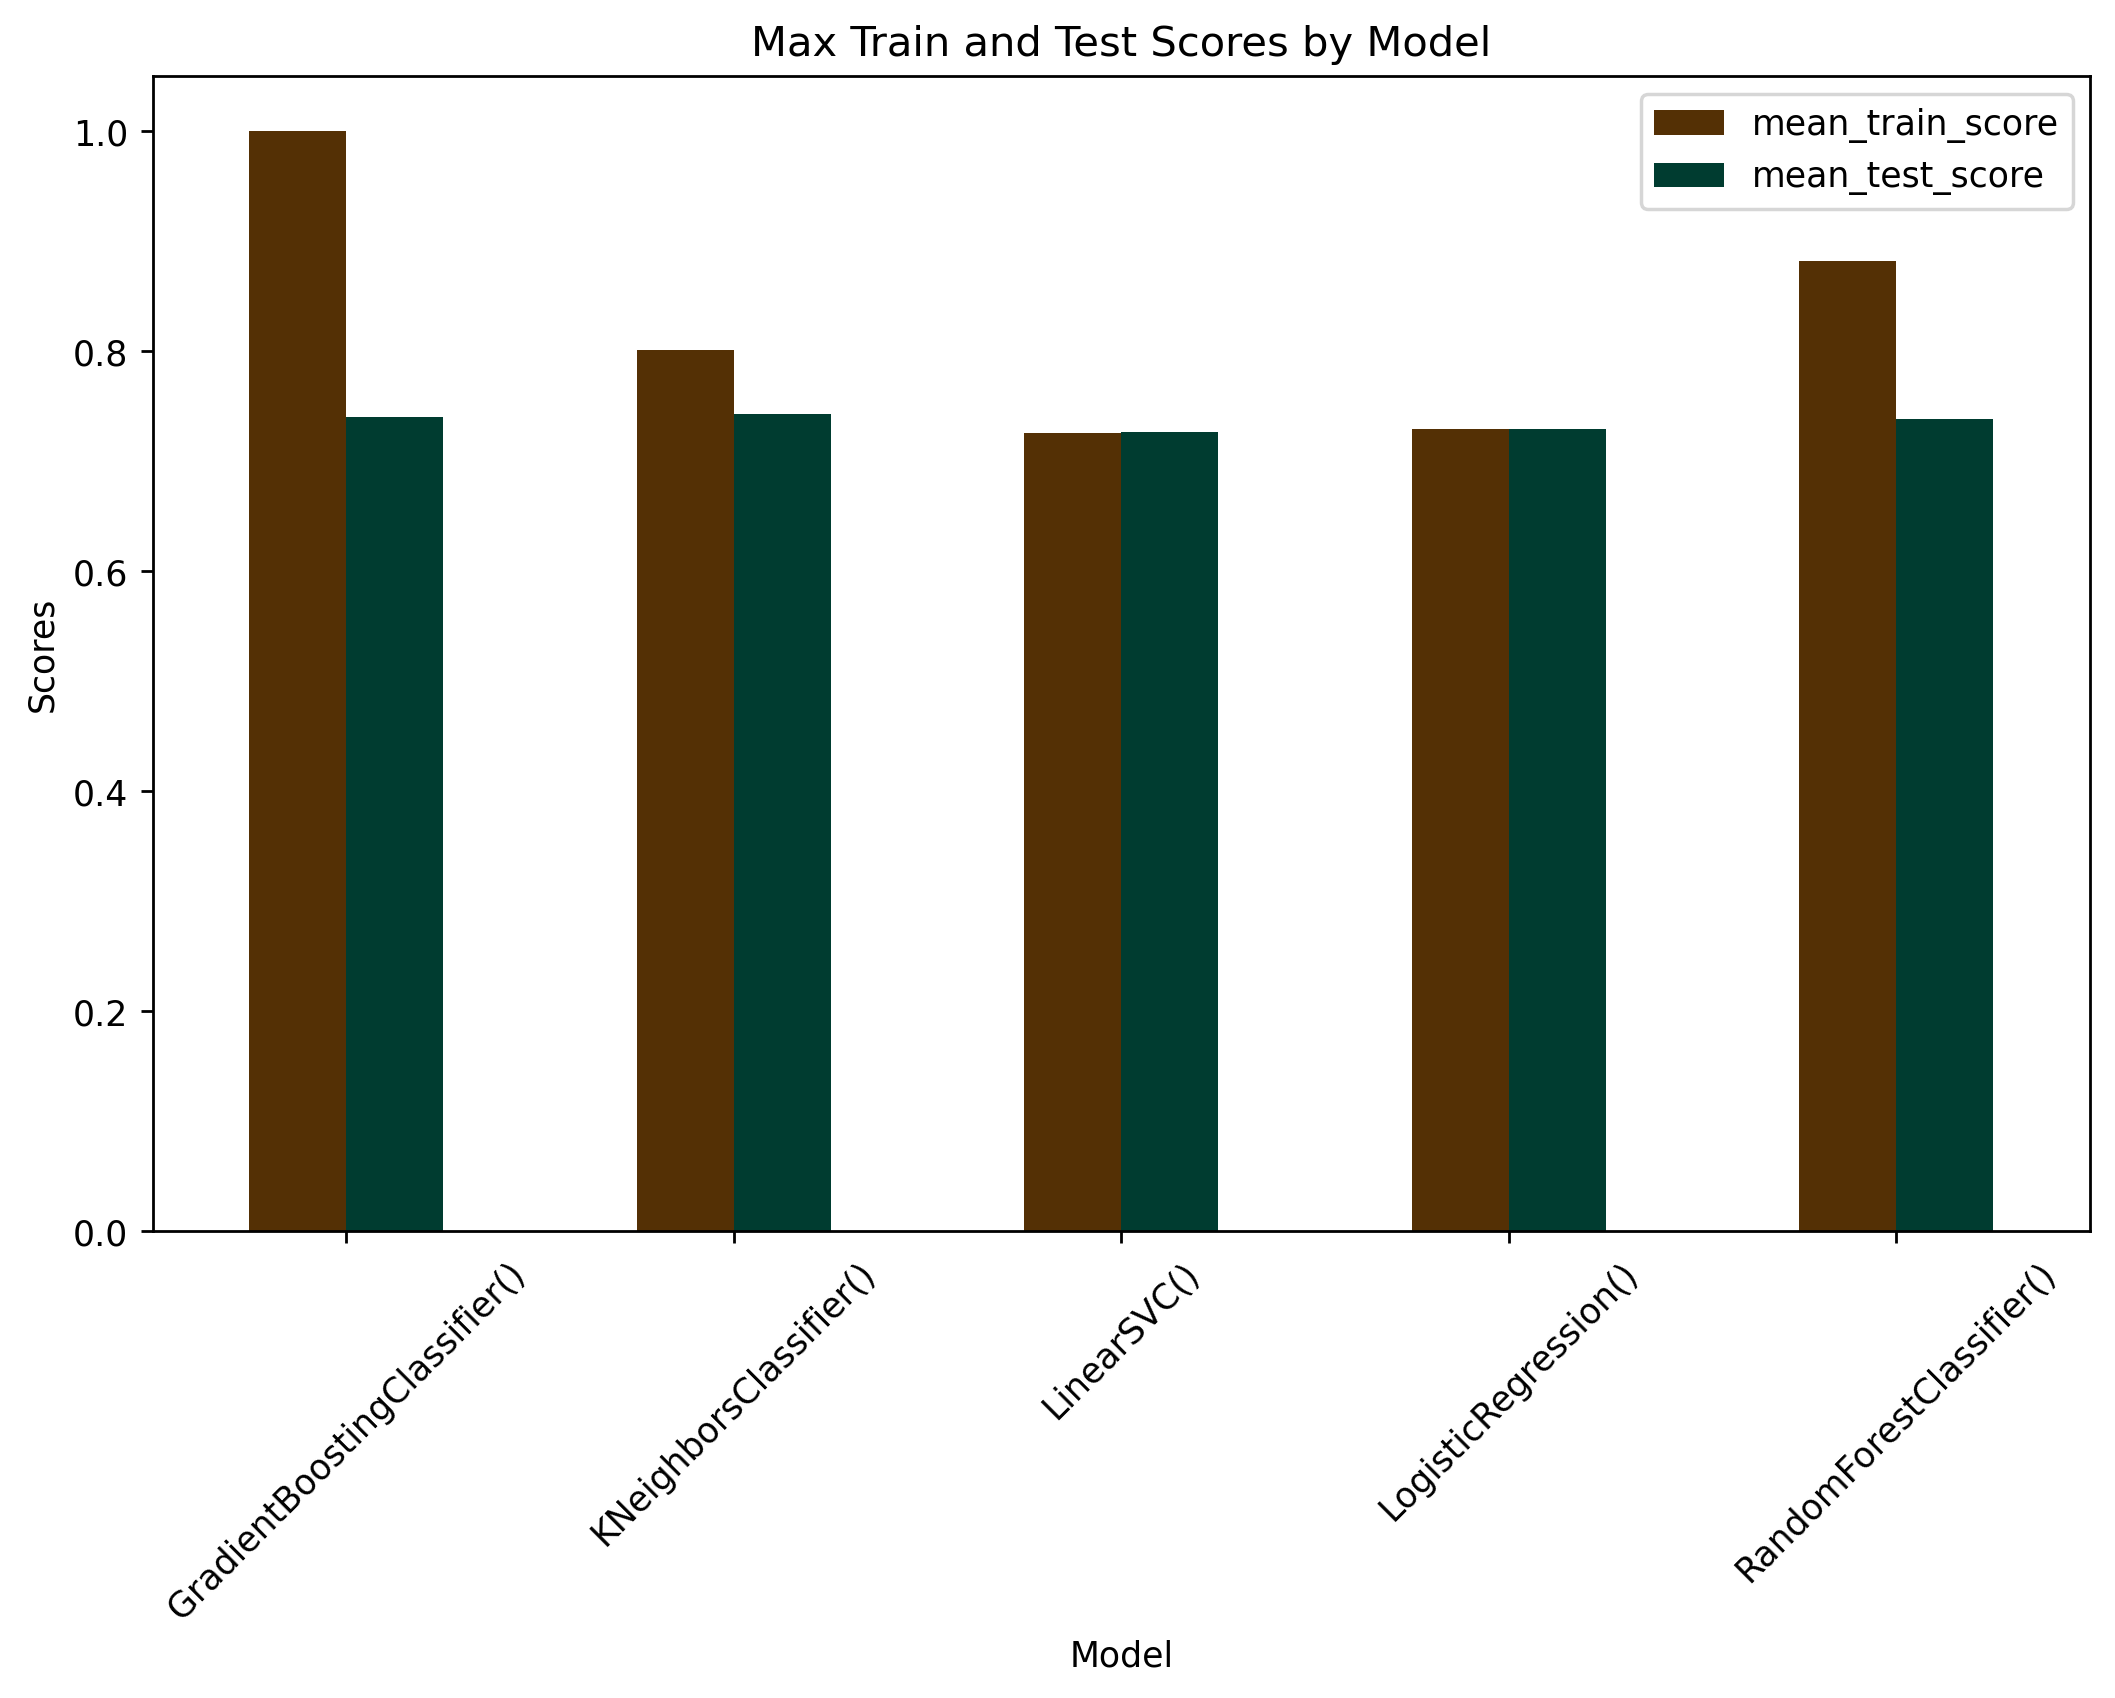

In [23]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
grouped_results.plot(kind='bar', ax=ax, colormap='BrBG')
ax.set_title('Max Train and Test Scores by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

<center><b>Figure 3</b>. Performance of other models without resampling</center>   
From Figure 3, unlike the stroke data. The model can actually somehow predict from the minority class a little bit better. This is because the distribution (80-20) is not as bad as the stroke dataset (95-5). 

In [24]:
best_model = grid_search.best_estimator_.fit(X_trainval, y_trainval)
best_model_score = best_model.score(X_holdout, y_holdout)

In [25]:
print(best_model_score)

0.7893877551020408


In [26]:
y_pred = grid_search.best_estimator_.predict(X_holdout)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_holdout, y_pred))

[[2800  138]
 [ 636  101]]


In [27]:
len(X_holdout)

3675

In [28]:
y_pred = grid_search.best_estimator_.predict(X_holdout)
print(classification_report(y_holdout, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      2938
           1       0.42      0.14      0.21       737

    accuracy                           0.79      3675
   macro avg       0.62      0.55      0.54      3675
weighted avg       0.74      0.79      0.74      3675



### Interpretation - without resampling
Given the 80-20 class distribution, the model's ability to predict loan defaults (class 1) is not as effective as its ability to predict non-defaults. This imbalance in performance is a challenge in such datasets, where the minority class (defaulters) is often of greater interest. The model's current configuration seems to favor the majority class, leading to a high number of false negatives for the minority class. To improve its utility in practical scenarios, it may be necessary to adjust the model or employ techniques specifically tailored to enhance its sensitivity to the minority class.

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">With Resampling - SMOTE</h2></center>
</div> 

---

### Predictor and Target Variable

In [29]:
data_smote = df_default.copy()
X = data_smote.drop('bad_loan', axis=1)
y = data_smote['bad_loan']

### Train-Validation-Test Split

In [30]:
test_size = 0.20
seed=143
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=test_size, 
    stratify=y,
    random_state=seed)

### Steps for Pipeline

In [31]:
# Define steps including the scaler and SMOTE
steps_smote = [
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", None)
]

### Using ImbPipeline 

In [32]:
pipe_smote = ImbPipeline(steps_smote)
param_grid_smote = [
    {
        "clf": [LinearSVC()],
        "clf__C": C_range,
        "clf__dual":['auto']
    },
    {
        "clf": [KNeighborsClassifier()],
        "clf__n_neighbors": n_neighbor_range,
    },
    {
        "clf": [RandomForestClassifier()],
        "clf__max_depth": max_depth_range,
    },
    {
        "clf": [GradientBoostingClassifier()],
        "clf__max_depth": max_depth_range,
        "clf__learning_rate": learning_rate_range,
    },
    {
        "clf": [LogisticRegression()],
        "clf__penalty": penalty,
        "clf__C": C_range,
        "clf__solver": ["liblinear"],
    },
]

### Determining the Right Scoring Metric

In [33]:
cv = 5
scoring = 'f1'
grid_search_smote = GridSearchCV(pipe_smote, param_grid_smote, return_train_score=True, cv=cv,
                           verbose=2, n_jobs=-1, scoring=scoring)
grid_search_smote.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 69 candidates, totalling 345 fits
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.4s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.6s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.5s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.5s
[CV] END ........clf=LinearSVC(), clf__C=0.1, clf__dual=auto; total time=   0.5s
[CV] END ........clf=LinearSVC(), clf__C=0.1, c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid=[{'clf': [LinearSVC()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__dual': ['auto']},
                         {'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [5, 6, 7, 8, 9, 10, 11]},
                         {'clf': [RandomForestClassifier()],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [GradientBoostingClassifier()],
                          'clf__learning_rate': [0.1, 0.5, 1.0],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear']}],
             return_train_score=True, scoring='f1', verbose=2)

In [34]:
print(f"The best model is: {grid_search_smote.best_params_}")
print(f"with an accuracy score of: {grid_search_smote.best_score_}")

The best model is: {'clf': LogisticRegression(), 'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
with an accuracy score of: 0.40150893633484463


In [35]:
cv_results_smote = pd.DataFrame(grid_search_smote.__dict__['cv_results_'])
cv_results_smote.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__dual,param_clf__n_neighbors,param_clf__max_depth,param_clf__learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
61,0.228928,0.042038,0.008763,0.001642,LogisticRegression(),0.1,NaN,NaN,NaN,NaN,...,0.401509,0.011147,1,0.398996,0.407258,0.404410,0.398758,0.399443,0.401773,0.003443
62,0.179752,0.043396,0.008120,0.001804,LogisticRegression(),0.1,NaN,NaN,NaN,NaN,...,0.400426,0.010483,2,0.399330,0.407495,0.403911,0.399038,0.399331,0.401821,0.003368
68,0.255652,0.011076,0.009939,0.000759,LogisticRegression(),100000.0,NaN,NaN,NaN,NaN,...,0.400320,0.010301,3,0.399218,0.407164,0.404023,0.399321,0.399498,0.401845,0.003219
67,0.248795,0.012467,0.009949,0.000561,LogisticRegression(),100000.0,NaN,NaN,NaN,NaN,...,0.400320,0.010301,3,0.399274,0.407164,0.404023,0.399321,0.399498,0.401856,0.003210
66,0.251722,0.013588,0.010168,0.000469,LogisticRegression(),1000.0,NaN,NaN,NaN,NaN,...,0.400320,0.010301,3,0.399218,0.407164,0.404023,0.399321,0.399498,0.401845,0.003219


<center><b>Table 6</b>. Results of the CV using GridSearchCV - with resampling</center>

In [36]:
cv_results_smote['param_clf'] = cv_results_smote['param_clf'].astype(str)
grouped_results_smote = cv_results_smote[['mean_train_score', 'mean_test_score', 'param_clf']].groupby('param_clf').max()[['mean_train_score', 'mean_test_score']]
grouped_results_smote

,mean_train_score,mean_test_score
param_clf,,
GradientBoostingClassifier(),1.000000,0.333114
KNeighborsClassifier(),0.645786,0.344396
LinearSVC(),0.400610,0.399819
LogisticRegression(),0.401867,0.401509
RandomForestClassifier(),0.837088,0.398999


<center><b>Table 7</b>. Performance of other Models - with resampling</center>

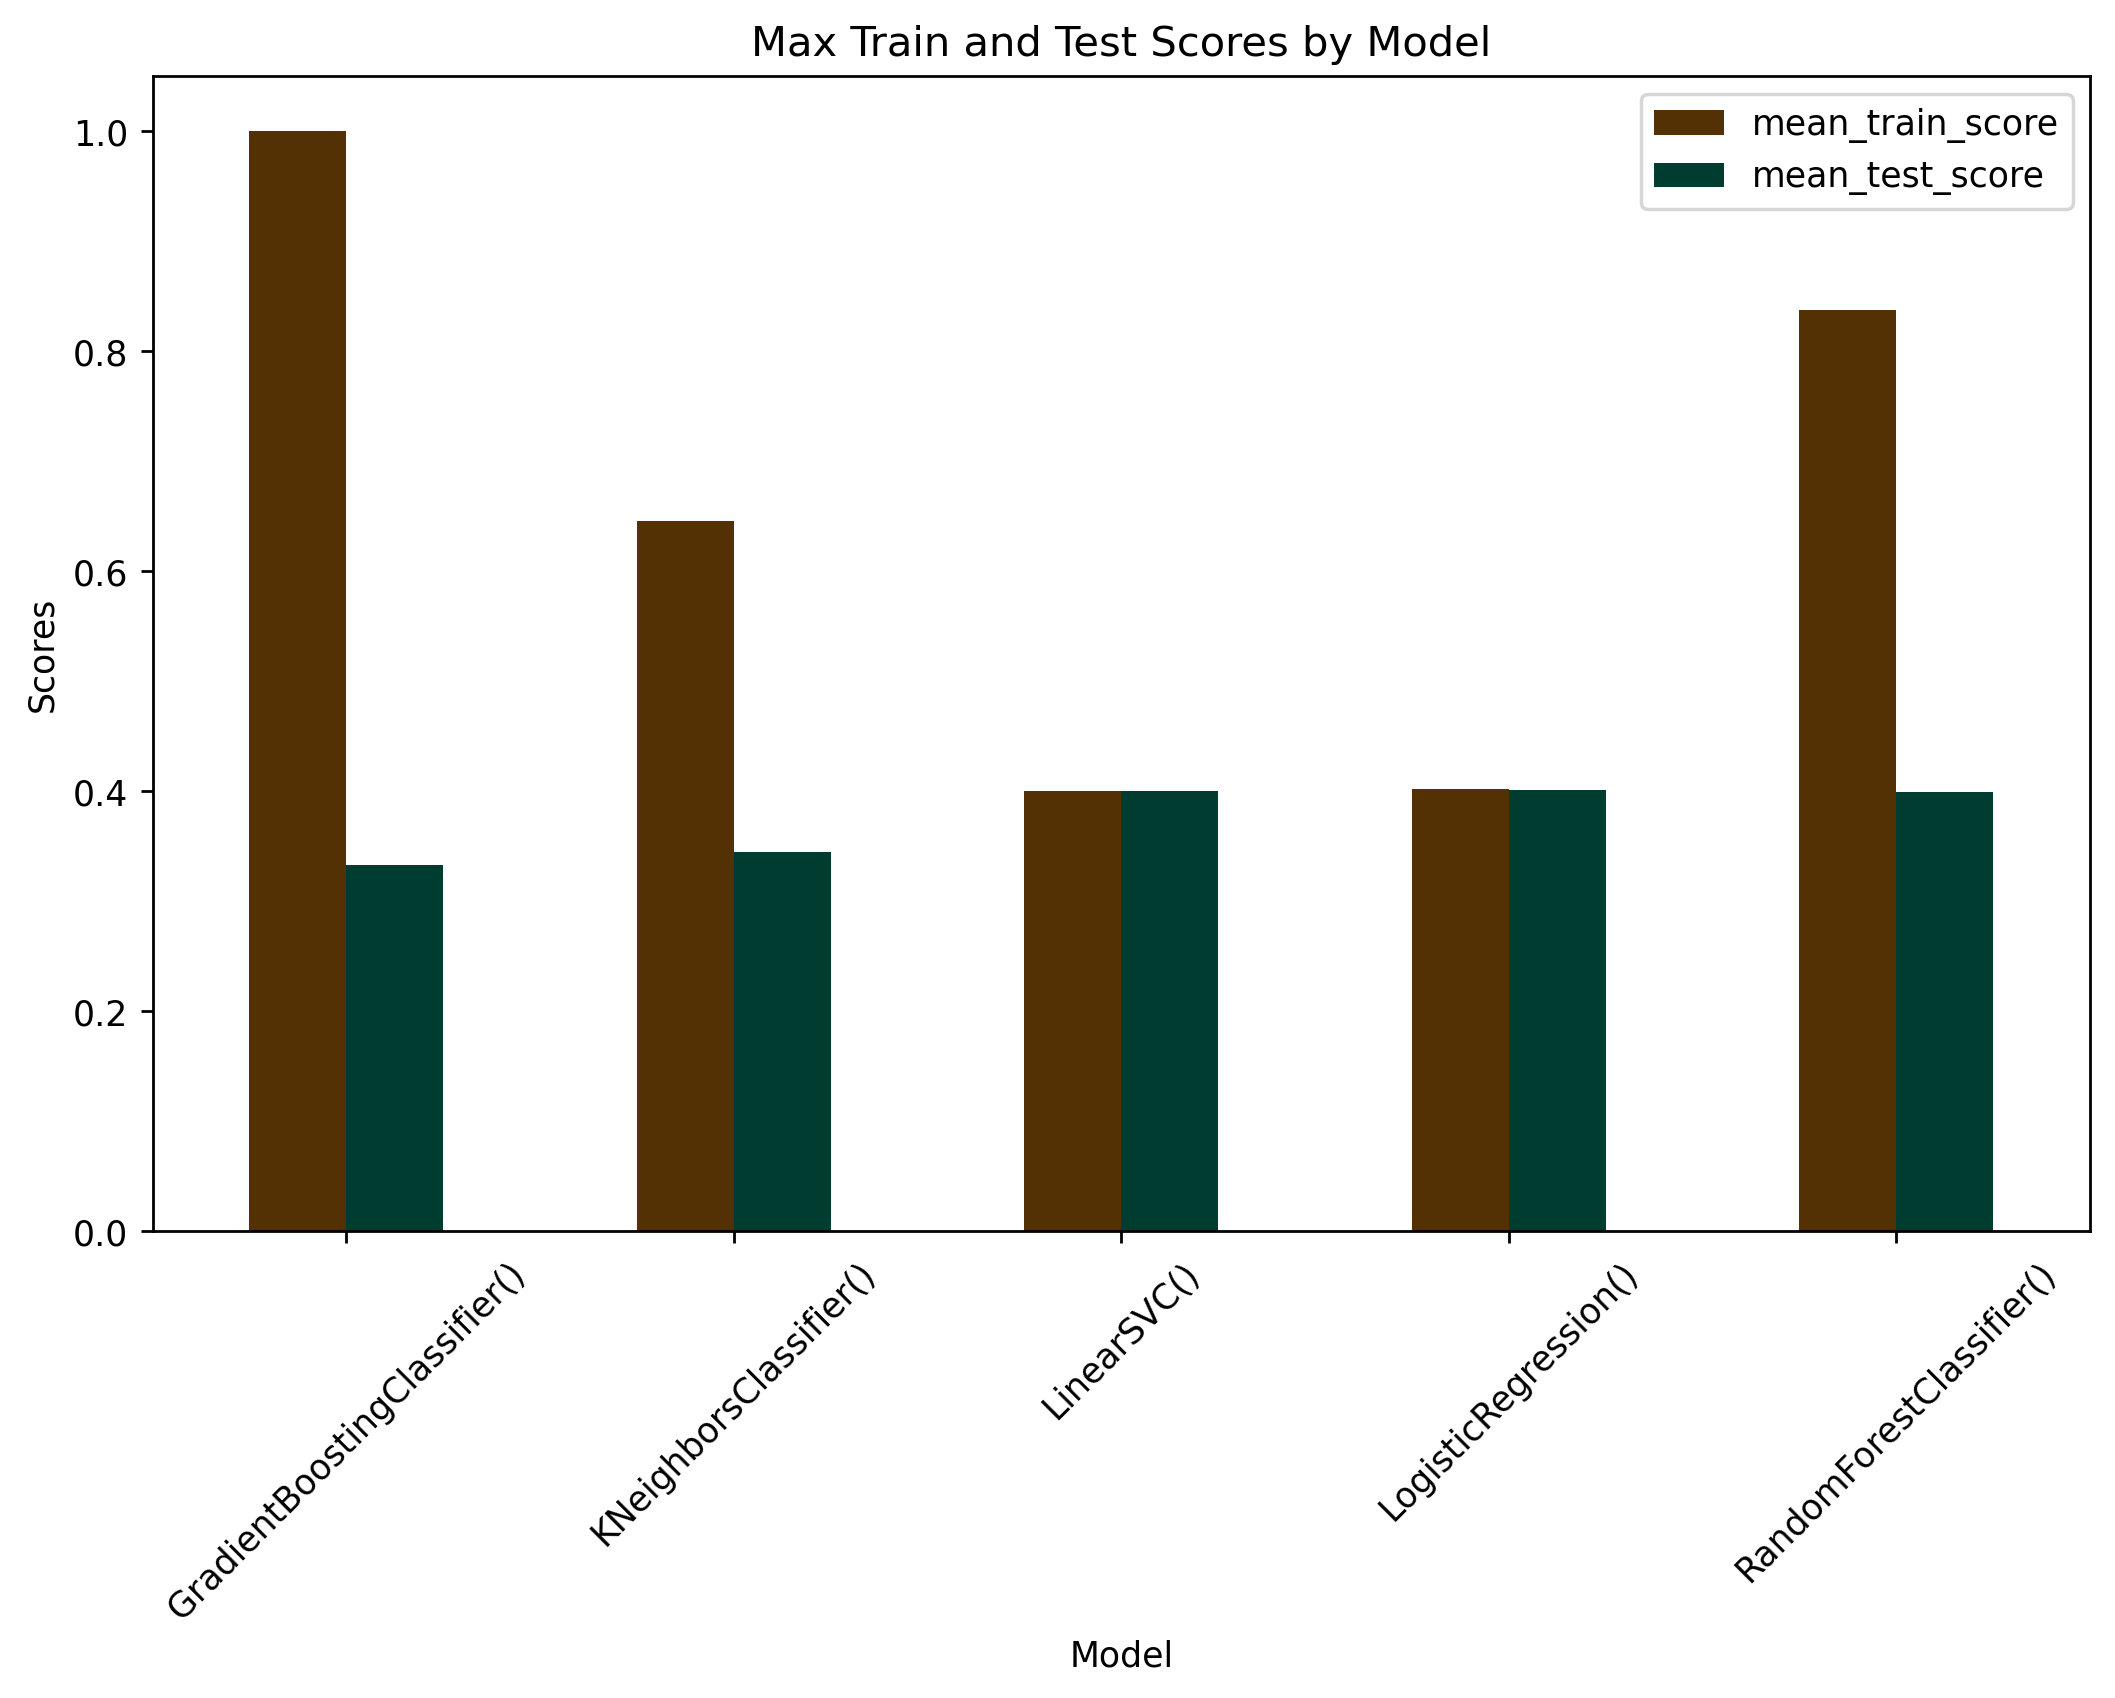

In [37]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
grouped_results_smote.plot(kind='bar', ax=ax, colormap='BrBG')
ax.set_title('Max Train and Test Scores by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

<center><b>Figure 4</b>. Performance of other models with resampling</center>   
Figure 4 indicates an enhancement in the model's capability to predict the minority class, as the class distribution is more balanced at an 80-20 ratio. This improvement suggests that the model is now better at identifying instances from the minority class compared to previous iterations.

### Refitting of the best model to the Train-Validation 

In [38]:
best_model_smote = grid_search_smote.best_estimator_.fit(X_trainval, y_trainval)
best_model_score_smote = best_model_smote.score(X_holdout, y_holdout)

In [39]:
print(best_model_score_smote)

0.6361904761904762


In [40]:
y_pred = best_model_smote.predict(X_holdout)
print (confusion_matrix(y_holdout, y_pred))

[[1881 1057]
 [ 280  457]]


In [41]:
y_pred = best_model_smote.predict(X_holdout)
print(classification_report(y_holdout, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      2938
           1       0.30      0.62      0.41       737

    accuracy                           0.64      3675
   macro avg       0.59      0.63      0.57      3675
weighted avg       0.76      0.64      0.67      3675



### Interpretation - with resampling - SMOTE
Applying SMOTE has improved the model's ability to identify the minority class (defaulters), as shown by the increased recall for Class 1. However, this improvement has led to a higher number of false positives, reducing the precision for this class. In this scenario, while the model has become better at detecting actual cases of loan default, it does so at the expense of mistakenly classifying a considerable number of non-defaulters as defaulters. This outcome highlights the need to further refine the model to achieve a better balance between accurately identifying defaulters and reducing false alarms.

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RESULTS and DISCUSSION</h1></center>
</div> 

In the context of predicting loan defaults, similar to stroke prediction, the involvement of domain experts and stakeholders, such as bank executives, is crucial in identifying the right balance between precision and recall based on current needs and objectives. These professionals have a comprehensive understanding of the banking industry's nuances, including risk tolerance, customer relationship management, and regulatory compliance.

The decision on the optimal balance between precision and recall in a loan default prediction model should be guided by bank executives and stakeholders. Their insights, grounded in the bank's strategic objectives, risk profile, and operational constraints, are invaluable in aligning the model's performance with the bank's overarching goals and KPIs.
